# Naive Bayes Classifier

## Video 23


### Use Case - Text Classification
- To perform text classification of News Headlines and classify news into different topics for News Headlines

In [2]:
# Loading the Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = data.target_names

# Training the data on these categories
train = fetch_20newsgroups(subset="train", categories=categories)

# Testing the data for these categories
test = fetch_20newsgroups(subset="test", categories=categories)

# Printing training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [5]:
# Import Necessary Packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinomial NB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model, with the train data
model.fit(train.data, train.target)

# Creating labels for the test data
labels = model.predict(test.data)

Text(89.133125, 0.5, 'Predicted Label')

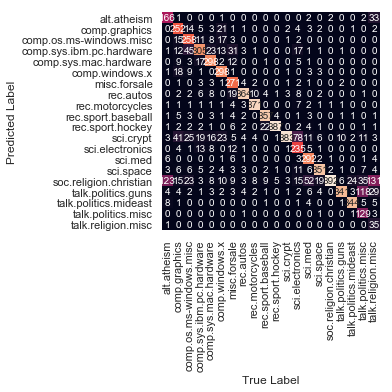

In [6]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
           xticklabels=train.target_names, yticklabels=train.target_names)

# Plotting Heatmap of Confusion Matrix
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [7]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [8]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [9]:
predict_category("Sending load to International Space Station")

'sci.space'

In [10]:
predict_category("BMW is better then Audi")

'rec.autos'

In [11]:
predict_category("President of India")

'talk.politics.misc'